In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
# Set up the database connection
engine = create_engine("sqlite:///../reddit_posts.db")

In [4]:
# Read posts
posts = pd.read_sql("posts_labeled", engine)
posts.head()

,id,subreddit,date,char_len,weekday,clean_text,vader,weak_label
0,c78w4x,investing,2019-06-30,1487,Sunday,need help thinking through a long-term play on...,0.9904,positive
1,c796k7,investing,2019-06-30,49,Sunday,auction.com real estate - advice needed!,0.0000,neutral
2,c7994a,investing,2019-06-30,1053,Sunday,does anyone else think that jim rogers is righ...,-0.9683,negative
3,c79p8x,investing,2019-06-30,444,Sunday,"for the ones actively valuing companies, does ...",0.9094,positive
4,c7bgfj,investing,2019-06-30,22,Sunday,p2p investing,0.0000,neutral


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Economics'),
  Text(1, 0, 'Gold'),
  Text(2, 0, 'PoliticalDiscussion'),
  Text(3, 0, 'finance'),
  Text(4, 0, 'geopolitics'),
  Text(5, 0, 'investing')])

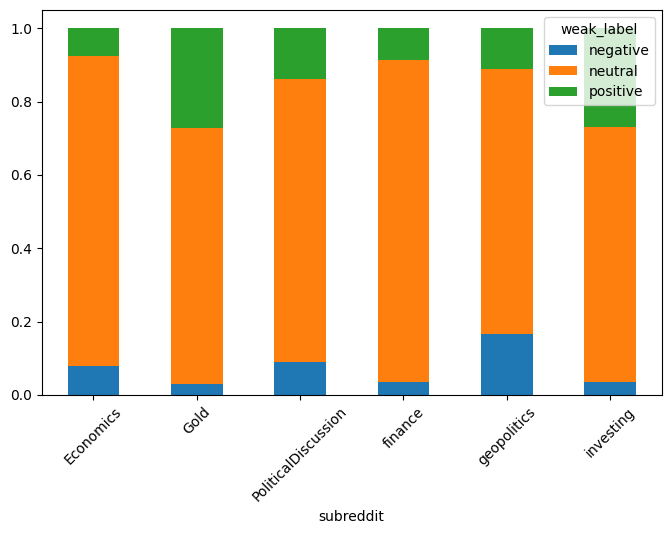

In [7]:
# Check label distribution per subreddit
subreddit_counts = posts.groupby(['subreddit', 'weak_label']).size().unstack(fill_value=0)

# Normalize the counts to get proportions
subreddit_proportions = subreddit_counts.div(subreddit_counts.sum(axis=1), axis=0)

# Plotting the proportions
subreddit_proportions.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.xticks(rotation=45)

In [8]:
subreddit_counts

weak_label,negative,neutral,positive
subreddit,,,
Economics,3547,38508,3414
Gold,1012,24834,9604
PoliticalDiscussion,4758,41306,7461
finance,1309,32465,3224
geopolitics,4222,18364,2822
investing,5438,105854,40768


In [9]:
# Repeat for comments
comments = pd.read_sql("comments_labeled", engine)
comments.head()

,id,subreddit,parent_id,date,char_len,clean_body,vader,weak_label
0,esdguxz,geopolitics,None,2019-06-30,9,why none?,0.0000,neutral
1,esdhtud,geopolitics,None,2019-06-30,1556,> who is the realist? it depends on what you m...,0.9092,positive
2,esdj0ib,geopolitics,None,2019-06-30,15,try outline.com,0.0000,neutral
3,esdj5ht,geopolitics,None,2019-06-30,126,russia can only be a centralized state due to ...,0.0000,neutral
4,esdj6vs,geopolitics,None,2019-06-30,143,migration is not a viable way to offset demogr...,0.0000,neutral


(array([0, 1]), [Text(0, 0, 'PoliticalDiscussion'), Text(1, 0, 'geopolitics')])

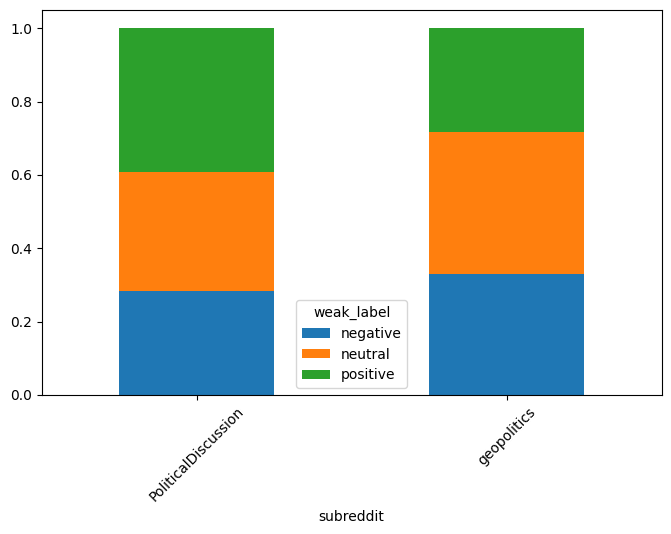

In [12]:
# Check label distribution per subreddit for comments
subreddit_counts_comments = comments.groupby(['subreddit', 'weak_label']).size().unstack(fill_value=0)

# Normalize the counts to get proportions for comments
subreddit_proportions_comments = subreddit_counts_comments.div(subreddit_counts_comments.sum(axis=1), axis=0)

# Plotting the proportions for comments
subreddit_proportions_comments.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.xticks(rotation=45)

In [11]:
subreddit_counts_comments

weak_label,negative,neutral,positive
subreddit,,,
PoliticalDiscussion,316880,365521,437695
geopolitics,133037,156908,114432


In [19]:
pd.unique(posts['subreddit'].values)

array(['investing', 'geopolitics', 'finance', 'PoliticalDiscussion',
       'Gold', 'Economics'], dtype=object)